<div style="color:#483D8B;text-align:center">
  <h1> Introduction: Fortune 500 Companies </h1>
  <h3> Ryan Gust </h3>
  <h4> Updated: 2019-01-08 </h4>
</div>

## Overview

The purpose of this introductory notebook is to get our feet wet with python for data analysis, starting off with a simple, but certainly not boring dataset. We will be using the Fortune 500 companies list from 1955-2005.

We'll do some simple plotting with pandas and matplotlib to explore the data in greater detail and address issues with the data as we come across them.

#### Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

The holy trinity of python data analysis, if ever in doubt, these imports are always a good place to start.

## Data

The external data used in this notebook can be obtained from: https://www.dataquest.io/blog/large_files/fortune500.csv

The CSV file contains information about fortune 500 companies spanning the years 1955 - 2005.<br>
There are 25500 rows representing 51 (years) sets of 500 (companies).

**The provided columns include:**

* `Year` - year that the fortune 500 list was published
* `Rank` - company's position on the fortune 500 list
* `Company` - name of the company
* `Revenue (in millions)` - company's revenue for that year
* `Profit (in millions)` - company's profit for that year

In [2]:
### Uncomment this line to pull in the dataset ###
#!wget https://www.dataquest.io/blog/large_files/fortune500.csv

In [3]:
f500_df = pd.read_csv('data/fortune500.csv')
f500_df.head()

,Year,Rank,Company,Revenue (in millions),Profit (in millions)
0,1955,1,General Motors,9823.5,806
1,1955,2,Exxon Mobil,5661.4,584.8
2,1955,3,U.S. Steel,3250.4,195.4
3,1955,4,General Electric,2959.1,212.6
4,1955,5,Esmark,2510.8,19.1


## Exploratory Data Analysis

Overall, the data is relatively clean. However, there are a few potential issues that should be noted:
* The Profit column had some entries with a value of 'N.A.' which caused the `dtype` of entire column to be cast to object instead of float preventing many numpy operations. This was resolved by simply replacing the 'N.A.' values with `np.nan` (0 also could have been used).
* Two companies (CBS and OfficeMax) appear to have been added to the list twice between the years 1972-1981 and 1995-2003. No attempt was made address these duplications, just in case there was a particular reason this was done (such as pre-merger representations), but it could done by dropping the duplicate rows or replacing the company name with unknown.

In [4]:
f500_df.dtypes

Year                       int64
Rank                       int64
Company                   object
Revenue (in millions)    float64
Profit (in millions)      object
dtype: object

In [5]:
# replace string 'N.A.' with numpy's nan value to correct dtype of Profit column
f500_df['Profit (in millions)'] = f500_df['Profit (in millions)'].replace('N.A.',np.nan).astype(np.float)
f500_df.dtypes

Year                       int64
Rank                       int64
Company                   object
Revenue (in millions)    float64
Profit (in millions)     float64
dtype: object

The dtype of Profit hinted at a potential issue with the data. Replacing the 'N.A.' values with numpy's `np.nan` allows us to cast the column to a float instead of an object, opening up the data for far more manipulations.

In [6]:
f500_df.Company.nunique()

1887

1887 unique companies have been included on the Fortune 500 list over the years

In [7]:
(f500_df.Company.value_counts() > 50).sum()

74

74 companies have been on the list every year since 1955

In [8]:
f500_df.Company.value_counts()[:10]

CBS                        57
OfficeMax                  55
Motorola                   51
Campbell Soup              51
Rohm & Haas                51
Procter & Gamble           51
Sunoco                     51
Kellogg                    51
Intl. Business Machines    51
Exxon Mobil                51
Name: Company, dtype: int64

It appears that CBS and OfficeMax, have duplicate entries in certain years, let's see if we can track down the erroneous years.

In [9]:
# Years 1972-1981 and 1995-2003 have duplicate values
(f500_df[f500_df.Company.isin(['CBS','OfficeMax'])]
 .groupby(['Year','Company'])['Company','Year']
 .count()).query('Company > 1')

,,Company,Year
Year,Company,,
1972,CBS,2,2
1973,CBS,2,2
1974,CBS,2,2
1975,CBS,2,2
1976,CBS,2,2
1977,CBS,2,2
1978,CBS,2,2
1979,CBS,2,2
1980,CBS,2,2


In [10]:
# Choose 3 companies for plotting
comp3_df = f500_df[f500_df.Company.isin(['Kellogg','3M','Pfizer'])].copy()

In [11]:
# Rename the columns for easier pandas access
comp3_df.rename(columns={'Revenue (in millions)':'Revenue_m', 'Profit (in millions)':'Profit_m'}, inplace=True)

In [12]:
comp3_df.sort_values(['Year','Rank'])[:9]

,Year,Rank,Company,Revenue_m,Profit_m
130,1955,131,3M,230.9,24.6
185,1955,186,Kellogg,169.5,12.7
214,1955,215,Pfizer,145.2,15.2
624,1956,125,3M,281.9,34.7
689,1956,190,Kellogg,182.1,13.8
706,1956,207,Pfizer,163.8,15.3
1115,1957,116,3M,330.8,38.7
1195,1957,196,Kellogg,201.7,15.1
1217,1957,218,Pfizer,178.4,18.3


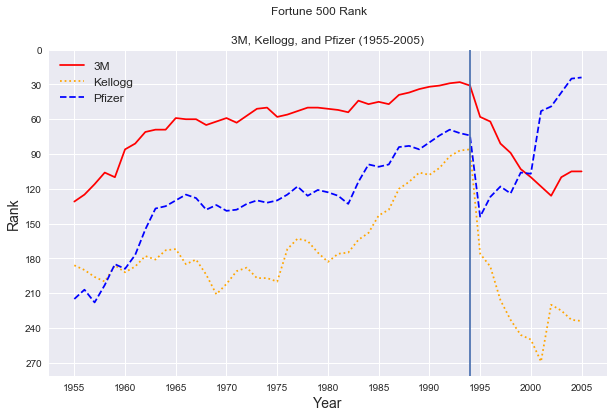

In [13]:
plt.style.use('seaborn')
fig, ax = plt.subplots(figsize=(10,6))
ax.plot('Year','Rank',data=comp3_df[comp3_df.Company=='3M'],c='red', linestyle='solid',label='3M')
ax.plot('Year','Rank',data=comp3_df[comp3_df.Company=='Kellogg'],c='orange', linestyle='dotted',label='Kellogg')
ax.plot('Year','Rank',data=comp3_df[comp3_df.Company=='Pfizer'],c='blue', linestyle='dashed',label='Pfizer')
ax.axvline(1994)
ax.set_xlabel('Year', fontdict={'fontsize':'14'})
ax.set_xticks(np.arange(1955,2006,5))

ax.set_ylabel('Rank',fontdict={'fontsize':'14'})
ax.set_yticks(np.arange(0,300,30))
ax.invert_yaxis()

ax.legend(fontsize='large',loc='best')
fig.suptitle('Fortune 500 Rank')
ax.set_title('3M, Kellogg, and Pfizer (1955-2005)');

Clearly, there was an upset in 1994 that led to the rank decline of at least 3 powerful companies. In absence of other information, one may guess that the proliferation of the internet may be at play in these sharp declines.

In [14]:
f93_96 = f500_df[f500_df.Year.isin(range(1993,1997))][['Year','Company','Rank']]

To get a closer look, we'll zoom in on the range between 1993 and 1996

In [15]:
f36_piv = f93_96.pivot_table(values=['Rank'],index=['Company'],columns=['Year']).Rank

Using a pivot table, we can see which companies joined the fortune 500 list between these years

In [16]:
f36_piv.fillna(501).diff(axis=1)[[1994,1995]].sort_values([1995])[:10]

Year,1994,1995
Company,,
Wal-Mart Stores,0.0,-497.0
AT&T,0.0,-496.0
Sears Roebuck,0.0,-492.0
State Farm Insurance Cos,0.0,-489.0
Prudential Ins. Co. of America,0.0,-488.0
Kmart Holding,0.0,-486.0
Citicorp,0.0,-484.0
ITT Industries,0.0,-478.0
Kroger,0.0,-476.0


Here, the negative numbers indicate how far each company jumped in rank between 1994 and 1995. 0 indicates no ranking for the year. 

In [17]:
f36_piv[f36_piv[1994].isna() & ~f36_piv[1995].isna()].shape

(288, 4)

In total, 288 companies joined the fortune 500 list that were not on it the previous year. So, our original hypothesis that the internet was the largest contributer is likely inaccurate. Given the shear number of new companies on the list, the more likely scenario is that in 1995 there was a change in how the ranking were calculated, or more companies were being considered.

In [18]:
f5s = f500_df.pivot_table(values=['Rank'],index=['Year'],columns=['Company']).Rank

In [19]:
year_diff = pd.Series({i+1:len(set(f5s.loc[i].dropna().index) - set(f5s.loc[i+1].dropna().index)) for i in f5s.index if i < 2005})

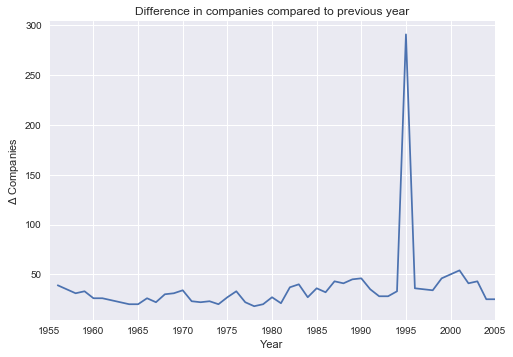

In [20]:
year_diff.plot(xticks=np.arange(1955,2006,5), 
               label=(plt.xlabel('Year'),plt.ylabel('$\Delta$ Companies')), 
               title="Difference in companies compared to previous year");

Looking at a chart of the year to year change in listed companies, we can see that 1994 to 1995 is an enormous outlier compared to all other year pairs. Assuming that there isn't an issue with dataset itself, we can almost certainly attribute this change to a revision in how the Fortune 500 list was chosen.  

## Conclusions

This notebook took a brief look at the Fortune 500 companies dataset (1955-2005). Our analysis led to several interesting discoveries, namely, we found that CBS and OfficeMax are included twice in certain years, and from 1994 to 1995 there was a dramatic shift in included companies. Despite the chosen dataset being relatively simple, we still managed to extract some useful information out of it. We did not even use the revenue or profits columns, so there is still a lot of room for exploration.

#### Future Work
We leave this notebook with some unanswered questions: 

* What actually caused the '94-95 shift? 
* Why were some companies included multiple times? 

A fully fleshed out analysis would seek external sources of information and bring it into the notebook to answer these questions. Additionally, we could certainly investigate profits and revenue to see how they correlate with ranking from year to year, or even do some simple linear modeling to really start to understand this data. These sort of analyses and many others will be performed in following notebooks, so have a look around if you'd like to dig a little deeper.